In [1]:
import numpy as np
import scipy 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import imageio

In [3]:
img = imageio.imread('ct.png', pilmode='L')

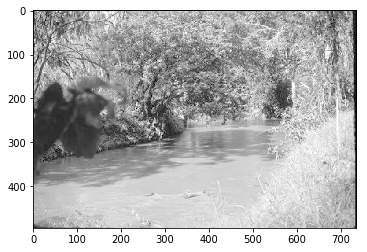

In [4]:
plt.imshow(img,cmap='gray')

In [5]:
img

Image([[ 0, 43, 46, ...,  0,  0,  0],
       [39, 43, 39, ...,  0,  0,  0],
       [50, 34, 21, ...,  0,  0,  0],
       ...,
       [43, 43, 50, ..., 21,  0,  0],
       [39, 39, 43, ...,  0,  0,  0],
       [34, 34, 34, ...,  0,  0,  0]], dtype=uint8)

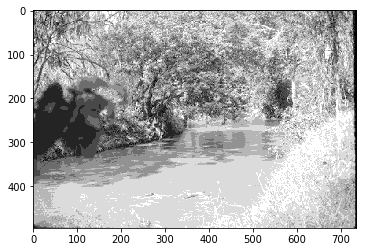

In [6]:
plt.imshow(img //32, cmap='gray')

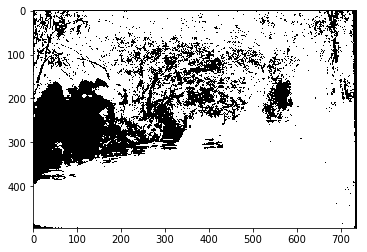

In [7]:
plt.imshow(img //128, cmap='gray')

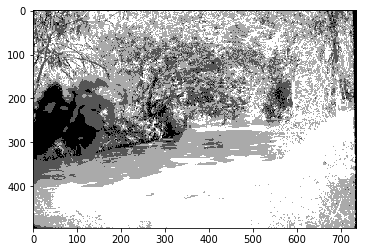

In [8]:
plt.imshow(img //64, cmap='gray')

In [9]:
%load_ext Cython


In [10]:
def co_occurrence_matrix(A, di, dj, levels):
    count = np.zeros((levels,levels))
    m,n = A.shape
    for i in range(m):
        for j in range(n):
            if 0<=i+di<m and 0<=j+dj<n:
                count[A[i,j],A[i+di,j+dj]] += 1
                count[A[i+di,j+dj],A[i,j]] += 1
    return count

In [11]:
%%time
co_occurrence_matrix(img //64, 1,0, 4)

Wall time: 563 ms


array([[3.90580e+04, 5.59600e+03, 2.90000e+02, 0.00000e+00],
       [5.59600e+03, 9.76820e+04, 2.11860e+04, 7.30000e+01],
       [2.90000e+02, 2.11860e+04, 2.31684e+05, 2.68630e+04],
       [0.00000e+00, 7.30000e+01, 2.68630e+04, 2.50728e+05]])

In [12]:
%%time
co_occurrence_matrix(img //64, 1,0, 4)

Wall time: 555 ms


array([[3.90580e+04, 5.59600e+03, 2.90000e+02, 0.00000e+00],
       [5.59600e+03, 9.76820e+04, 2.11860e+04, 7.30000e+01],
       [2.90000e+02, 2.11860e+04, 2.31684e+05, 2.68630e+04],
       [0.00000e+00, 7.30000e+01, 2.68630e+04, 2.50728e+05]])

In [13]:
%%cython

cimport numpy as np

def co_occurrence_matrix_cython(np.ndarray count, np.ndarray A, int m, int n, int di, int dj, int levels):
    #count = np.zeros((levels,levels))
    #m,n = A.shape
    for i in range(m):
        for j in range(n):
            if 0<=i+di<m and 0<=j+dj<n:
                count[A[i,j],A[i+di,j+dj]] += 1
                count[A[i+di,j+dj],A[i,j]] += 1
    return count

In [14]:
%%time

count = np.zeros(img.shape)
co_occurrence_matrix_cython(count, img, img.shape[0], img.shape[1], 0, 1, 4)

Wall time: 477 ms


In [15]:
%%time

co_occurrence_matrix_cython(count, img, img.shape[0], img.shape[1], 0, 1, 4)

Wall time: 512 ms


array([[2612.,    0.,    0., ...,    0.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       ...,
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.]])

In [16]:
%%cython --annotate

cimport numpy as np

def co_occurrence_matrix_cython(np.ndarray count, np.ndarray A, int m, int n, int di, int dj, int levels):
    #count = np.zeros((levels,levels))
    #m,n = A.shape
    for i in range(m):
        for j in range(n):
            if 0<=i+di<m and 0<=j+dj<n:
                count[A[i,j],A[i+di,j+dj]] += 1
                count[A[i+di,j+dj],A[i,j]] += 1
    return count

In [17]:
%%cython --annotate

cimport numpy as np

def co_occurrence_matrix_cython(np.ndarray count, np.ndarray A, int m, int n, int di, int dj, int levels):
    #count = np.zeros((levels,levels))
    #m,n = A.shape
    cdef int i,j
    for i in range(m):
        for j in range(n):
            if 0<=i+di<m and 0<=j+dj<n:
                count[A[i,j],A[i+di,j+dj]] += 1
                count[A[i+di,j+dj],A[i,j]] += 1
    return count

In [18]:
%%cython --annotate

cimport numpy as np

def co_occurrence_matrix_cython(unsigned char[:, :]  count, unsigned char[:, :]  A, int m, int n, int di, int dj, int levels):
    #count = np.zeros((levels,levels))
    #m,n = A.shape
    cdef int i,j
    for i in range(m):
        for j in range(n):
            if 0<=i+di<m and 0<=j+dj<n:
                count[A[i,j],A[i+di,j+dj]] += 1
                count[A[i+di,j+dj],A[i,j]] += 1
    return count

In [19]:
count = np.zeros(img.shape, dtype=np.uint8)

In [20]:
count

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [21]:
img.dtype

dtype('uint8')

In [22]:
count.dtype

dtype('uint8')

In [23]:
%%time

co_occurrence_matrix_cython(count, img, img.shape[0], img.shape[1], 0, 1, 4)

Wall time: 3.47 ms


<MemoryView of 'ndarray' at 0x26a9ef17a38>

In [24]:
%%time

count = np.zeros((4,4), dtype=np.uint8)
co_occurrence_matrix_cython(count, img//64, img.shape[0], img.shape[1], 0, 1, 4)

Wall time: 4.46 ms


In [25]:
count

array([[100, 113, 180,   0],
       [113,  60, 153,  87],
       [180, 153,  52,  29],
       [  0,  87,  29,  42]], dtype=uint8)

In [26]:
np.sum(count)

1378

In [27]:
np.prod(img.shape)

364320

255溢出了。。脑残了

In [28]:
%%cython --annotate

cimport numpy as np

def co_occurrence_matrix_cython(int [:, :]  count, unsigned char[:, :]  A, int m, int n, int di, int dj, int levels):
    #count = np.zeros((levels,levels))
    #m,n = A.shape
    cdef int i,j
    for i in range(m):
        for j in range(n):
            #if 0<=i+di and i+di<m and 0<=j+dj and j+dj<n:
            if 0<=i+di<m and 0<=j+dj<n:
                count[A[i,j],A[i+di,j+dj]] += 1
                count[A[i+di,j+dj],A[i,j]] += 1
    return count

In [29]:
%%time

count = np.zeros((4,4), dtype=np.int32)
co_occurrence_matrix_cython(count, img//64, img.shape[0], img.shape[1], 0, 1, 4)

Wall time: 5.95 ms


In [30]:
count

array([[ 39012,   5745,    180,      0],
       [  5745,  97596,  21145,     87],
       [   180,  21145, 233524,  25629],
       [     0,     87,  25629, 251946]])

In [32]:
np.sum(count)

727650